In [261]:
%matplotlib inline

from MLP import *

from skimage.io import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [11]:
df = pd.read_csv('data/train.csv')

In [124]:
def draw_image(img):
    plt.figure()
    print("This number is: %i" % img.values[0])
    plt.imshow(np.reshape(img.values[1:], (28, 28)))
    
# draw_image(df.iloc[88, :])

This numbr is: 1
This numbr is: 0
This numbr is: 1
This numbr is: 4
This numbr is: 0


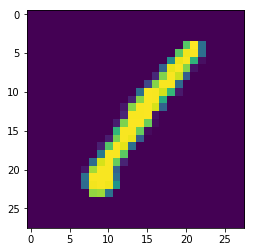

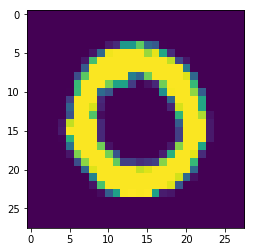

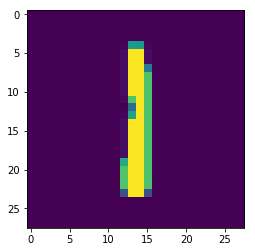

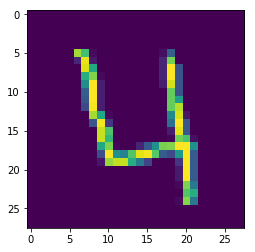

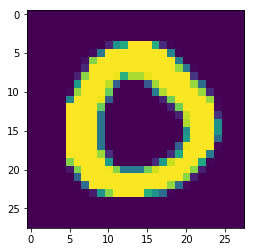

In [33]:
for i, image in df.head().iterrows():
    draw_image(image)

In [211]:
x = df.loc[:, "pixel0":].values
x = (x > 128).astype("float")
y = df.loc[:, "label"]
y = np.zeros((len(df), 10))
for i, answer in enumerate(df.loc[:, "label"]):
    y[i][answer] = 1.0

In [213]:
nn = Network(len(x[0]), 100, 1000, 0.03)
nn.add_layer(10)

In [214]:
train_size = 1100
print("START")
nn.train(x[:train_size], y[:train_size]);
print("END")

START
Start training
Iteration: 0
Error: 0.921703
Iteration: 1
Error: 0.896961
Iteration: 2
Error: 0.888055
Iteration: 3
Error: 0.866006
Iteration: 4
Error: 0.810629
Iteration: 5
Error: 0.723841
Iteration: 6
Error: 0.637454
Iteration: 7
Error: 0.561222
Iteration: 8
Error: 0.497441
Iteration: 9
Error: 0.446743
Iteration: 10
Error: 0.405513
Iteration: 11
Error: 0.370281
Iteration: 12
Error: 0.340063
Iteration: 13
Error: 0.314502
Iteration: 14
Error: 0.292792
Iteration: 15
Error: 0.274072
Iteration: 16
Error: 0.257669
Iteration: 17
Error: 0.243103
Iteration: 18
Error: 0.230046
Iteration: 19
Error: 0.218258
Iteration: 20
Error: 0.207553
Iteration: 21
Error: 0.197778
Iteration: 22
Error: 0.188802
Iteration: 23
Error: 0.180518
Iteration: 24
Error: 0.172833
Iteration: 25
Error: 0.165668
Iteration: 26
Error: 0.158956
Iteration: 27
Error: 0.152640
Iteration: 28
Error: 0.146675
Iteration: 29
Error: 0.141024
Iteration: 30
Error: 0.135658
Iteration: 31
Error: 0.130554
Iteration: 32
Error: 0.125694

This number is: 5
[  7.21683814e-03   1.72422542e-05   1.07477155e-05   7.25986858e-04
   5.17766643e-08   9.95739084e-01   1.02647426e-04   1.93578386e-06
   2.31827009e-04   2.86953079e-09]
Predicted number: 5, probability: 0.995739


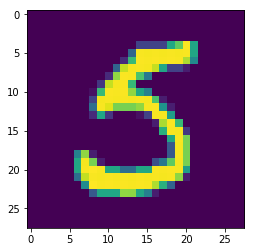

In [344]:
img_index = 2227

draw_image(df.loc[img_index , :])
answer = nn.predict((df.loc[img_index, "pixel0":].values > 128).astype("float"))
print(answer)
print("Predicted number: %i, probability: %f" % (list(answer).index(max(answer)), max(answer)))

In [268]:
d = {
    "layer_1" : nn.layers[0].weight.tolist(),
    "layer_2" : nn.layers[1].weight.tolist()
    
}

with open('data/nn_weights.json', 'w') as f:
    json.dump(d, f)
    print("Saved weights into file")
print(len(nn.layers))
nn.layers[0]